### Importing the file and the neccecary libraries

In [ ]:
import pandas as pd #for reading and manuplating  file
import numpy as np #for manuplating the arrays and performing mathematical functions on them
import math #For basic maths operations
import datetime #to work with dates in data
import seaborn as sns #to visualize
import matplotlib as plt #to visualize
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

### Exploring the file and its data types and cleaning the data

In [ ]:
df = pd.read_excel('/content/SimbITe 7.0 Data.xlsx') #importing the excel file

In [ ]:
df.head(5) #displaying the first five columns of tha data file

,Takeoff Date,Takeoff Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate
0,2077-11-28,16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,Heavy Rain,559,0.0,0,AL-9002,Shillong,Clear,56.0,SN490,0.84
1,2077-11-23,17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,Clear,1090,0.0,0,AL-7396,Trichy,Foggy,139.0,A948,0.89
2,2077-06-05,08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,Overcast,959,0.0,0,BA-3941,Bengaluru,Clear,120.0,A948,0.89
3,2077-04-27,14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,Overcast,708,0.0,0,AI-9119,Bengaluru,Cloudy,63.0,SN490,0.95
4,2077-08-01,05:17:36,74232.9,113713.60,False,VIP,Lucknow,Cloudy,1959,0.0,0,VI-5208,Trichy,Clear,220.0,A960,0.93


In [ ]:
df.dtypes #knowing the data types of all the columns

Takeoff Date                            datetime64[ns]
Takeoff Time                                    object
Average Ticket Price (Economy Class)           float64
Average Ticket Price (Premium Class)           float64
Cancelled                                         bool
Carrier                                         object
Origin                                          object
Origin Weather                                  object
Distance (Miles)                                 int64
Flight Delay                                   float64
Flight Delay (Min)                               int64
Flight Number                                   object
Destination                                     object
Destination Weather                             object
Total Flight Time (mins)                       float64
Plane Type                                      object
Occupancy Rate                                 float64
dtype: object

In [ ]:
df.isnull().sum() #checking if there are  null values present in the data

Takeoff Date                              0
Takeoff Time                              0
Average Ticket Price (Economy Class)      0
Average Ticket Price (Premium Class)      0
Cancelled                                 0
Carrier                                   0
Origin                                    0
Origin Weather                            0
Distance (Miles)                          0
Flight Delay                            419
Flight Delay (Min)                        0
Flight Number                             0
Destination                               0
Destination Weather                       0
Total Flight Time (mins)                419
Plane Type                                0
Occupancy Rate                            0
dtype: int64

In [ ]:
df['Flight Delay'] = df['Flight Delay'].fillna(0) 
#replacing null values of flight delay by 0

In [ ]:
 
df = df.dropna() #removing null values

In [ ]:
df['Takeoff Time'].head(5) #displaying the first five values of column Takeoff Time

0    16:37:01
1    17:47:54
2    08:36:29
3    14:27:27
4    05:17:36
Name: Takeoff Time, dtype: object

In [ ]:

df['Takeoff Date'] = df['Takeoff Date'].astype(str) #changing the data type of takeoff date column to string
df['Takeoff Time'] = df['Takeoff Time'].astype(str)#changing the data type of column takeoff time to string
df['Takeoff Date Time'] = df['Takeoff Date']+" "+df['Takeoff Time']#combining the two columns into one column known as takeoff date time
df['Takeoff Date Time'] = df['Takeoff Date Time'].astype("<M8[ns]") #converting dta type of new column to datetime 
df.head(5)

,Takeoff Date,Takeoff Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate,Takeoff Date Time
0,2077-11-28,16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,Heavy Rain,559,0.0,0,AL-9002,Shillong,Clear,56.0,SN490,0.84,2077-11-28 16:37:01
1,2077-11-23,17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,Clear,1090,0.0,0,AL-7396,Trichy,Foggy,139.0,A948,0.89,2077-11-23 17:47:54
2,2077-06-05,08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,Overcast,959,0.0,0,BA-3941,Bengaluru,Clear,120.0,A948,0.89,2077-06-05 08:36:29
3,2077-04-27,14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,Overcast,708,0.0,0,AI-9119,Bengaluru,Cloudy,63.0,SN490,0.95,2077-04-27 14:27:27
4,2077-08-01,05:17:36,74232.9,113713.60,False,VIP,Lucknow,Cloudy,1959,0.0,0,VI-5208,Trichy,Clear,220.0,A960,0.93,2077-08-01 05:17:36


In [ ]:

df = df.drop(['Takeoff Date','Takeoff Time'],axis = 1) #dropping takeoff date and takeoff time columns

In [ ]:

cols = df.columns.tolist() #converting data frame into list
cols = cols[-1:] + cols[:-1] 
df = df[cols]
df.head(5)

,Occupancy Rate,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type
0,0.84,30992.5,137060.00,False,ALPHABET,Kolkata,Heavy Rain,559,0.0,0,AL-9002,Shillong,Clear,56.0,SN490
1,0.89,9128.0,86103.50,False,ALPHABET,Udaipur,Clear,1090,0.0,0,AL-7396,Trichy,Foggy,139.0,A948
2,0.89,35866.6,164321.15,False,BANANA,Ahmedabad,Overcast,959,0.0,0,BA-3941,Bengaluru,Clear,120.0,A948
3,0.95,31801.0,120228.50,False,AIRAMAZON,Shillong,Overcast,708,0.0,0,AI-9119,Bengaluru,Cloudy,63.0,SN490
4,0.93,74232.9,113713.60,False,VIP,Lucknow,Cloudy,1959,0.0,0,VI-5208,Trichy,Clear,220.0,A960


In [ ]:
df.dtypes #checking the data types

Takeoff Date Time                       datetime64[ns]
Average Ticket Price (Economy Class)           float64
Average Ticket Price (Premium Class)           float64
Cancelled                                         bool
Carrier                                         object
Origin                                          object
Origin Weather                                  object
Distance (Miles)                                 int64
Flight Delay                                   float64
Flight Delay (Min)                               int64
Flight Number                                   object
Destination                                     object
Destination Weather                             object
Total Flight Time (mins)                       float64
Plane Type                                      object
Occupancy Rate                                 float64
dtype: object

In [ ]:
df.shape  #getting the shape of the dataframe


(9581, 16)

In [ ]:
df.describe() # describes the data set i.e. gives insights of dataset columns that are numerical


,Occupancy Rate,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Distance (Miles),Flight Delay,Flight Delay (Min),Total Flight Time (mins)
count,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000
mean,0.850372,38027.290606,110919.411074,1301.318547,0.109592,8.762551,157.225759
std,0.089593,21228.054532,35191.385523,526.605365,0.312397,28.461520,67.715977
min,0.700000,8750.000000,56000.000000,517.000000,0.000000,0.000000,39.000000
25%,0.770000,22463.000000,84420.000000,813.000000,0.000000,0.000000,99.000000
50%,0.850000,34772.500000,107625.000000,1218.000000,0.000000,0.000000,154.000000
75%,0.930000,47449.500000,130805.500000,1789.000000,0.000000,0.000000,213.000000
max,1.000000,129771.250000,237559.700000,2162.000000,1.000000,150.000000,410.000000


Finding the unique values in each column and then label encoding it to easily find relations

In [ ]:
df['Flight Number'].unique() #finding unique values in the column flight number

array(['AL-9002', 'AL-7396', 'BA-3941', ..., 'ST-6010', 'AI-1783',
       'AR-7810'], dtype=object)

In [ ]:
df['Origin Weather'].unique() #finding unique values in the column origin weather

array(['Heavy Rain', 'Clear', 'Overcast', 'Cloudy', 'Rainy',
       'Damaging Wind', 'Foggy', 'Storm'], dtype=object)

In [ ]:
x = [] #delaring an empty array
x = df['Destination Weather'].unique() #storing the unique values of the column destination weather in the array
x.sort() #sorting the array
print(x) #printing the array
print(df['Destination Weather'].unique()) #printing the unique values of the destination weather column

['Clear' 'Cloudy' 'Damaging Wind' 'Foggy' 'Heavy Rain' 'Overcast' 'Rainy'
 'Storm']
['Clear' 'Foggy' 'Cloudy' 'Rainy' 'Overcast' 'Damaging Wind' 'Heavy Rain'
 'Storm']


In [ ]:
dictionary_for_weather = {
    'Clear' : 0,
    'Cloudy' : 1,
    'Damaging Wind' : 2,
    'Foggy' : 3,
    'Heavy Rain' : 4,
    'Overcast' : 5,
    'Rainy' : 6,
    'Storm' : 7
} #creating a dictionary for all the unique values of the the column destination weather with unique keys
dictionary_for_weather #printing the dictionary #label encoding

{'Clear': 0,
 'Cloudy': 1,
 'Damaging Wind': 2,
 'Foggy': 3,
 'Heavy Rain': 4,
 'Overcast': 5,
 'Rainy': 6,
 'Storm': 7}

In [ ]:
print(df['Destination Weather'].unique()) #finding the unique values of column destination weather
print(df['Origin Weather'].unique()) #finding unque values of column origin weather
df['Destination Weather'] = df['Destination Weather'].replace(dictionary_for_weather)  #replacing the values of destination weather with the keys of dictionary_for_weather
df['Origin Weather'] = df['Origin Weather'].replace(dictionary_for_weather) #replacing the values of Origin weather with the keys of dictionary_for_weather
print(df['Destination Weather'].unique()) #printing the unique values of the new values from the column
print(df['Origin Weather'].unique()) #printing the unique values of the new values from the column

['Clear' 'Foggy' 'Cloudy' 'Rainy' 'Overcast' 'Damaging Wind' 'Heavy Rain'
 'Storm']
['Heavy Rain' 'Clear' 'Overcast' 'Cloudy' 'Rainy' 'Damaging Wind' 'Foggy'
 'Storm']
[0 3 1 6 5 2 4 7]
[4 0 5 1 6 2 3 7]


In [ ]:
df.head(5) #printing the first five rows to see the output and changes

,Takeoff Date Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate
0,2077-11-28 16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,4,559,0.0,0,AL-9002,Shillong,0,56.0,SN490,0.84
1,2077-11-23 17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,0,1090,0.0,0,AL-7396,Trichy,3,139.0,A948,0.89
2,2077-06-05 08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,5,959,0.0,0,BA-3941,Bengaluru,0,120.0,A948,0.89
3,2077-04-27 14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,5,708,0.0,0,AI-9119,Bengaluru,1,63.0,SN490,0.95
4,2077-08-01 05:17:36,74232.9,113713.60,False,VIP,Lucknow,1,1959,0.0,0,VI-5208,Trichy,0,220.0,A960,0.93


In [ ]:
df['Destination'].unique() #finding the unique values of the column destination

array(['Shillong', 'Trichy', 'Bengaluru', 'Kozhikode', 'Udaipur',
       'Kashipur', 'Kolkata', 'Lucknow', 'Indore', 'Ahmedabad', 'Raipur',
       'Ranchi'], dtype=object)

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()   
df['Destination encoded']= label_encoder.fit_transform(df['Destination'])  #assigning unque values to all the values of the column destination encoded
  
df['Destination encoded'].unique()  #printing the unique values from the new values of the column

array([ 9, 10,  1,  5, 11,  3,  4,  6,  2,  0,  7,  8])

In [ ]:
df['Origin encoded']= label_encoder.fit_transform(df['Origin']) #assigning unque encoded values to all the values of the column origin encoded
  
df['Origin encoded'].unique() #printing the unique values from the new values of the column

array([ 4, 11,  0,  9,  6,  8,  1,  7,  5,  2, 10,  3])

In [ ]:
df['Cancelled encoded']= label_encoder.fit_transform(df['Cancelled']) #assigning unque encoded values to all the values of the cancelled encoded
  
print(df['Cancelled encoded'].unique() ) #printing the unique values from the new values of the column

[0]


In [ ]:
df['Carrier'].unique() #printing the unique values from the column Carrier

array(['ALPHABET', 'BANANA', 'AIRAMAZON', 'VIP', 'SPACEAXE',
       'ARCHIPELAGO', 'PEACOCK', 'STELLARCRAFT', 'SEON', 'BIGFALCON'],
      dtype=object)

In [ ]:
df['Carrier encoded']= label_encoder.fit_transform(df['Carrier']) #assigning unque encoded values to all the values of the Carrier encoded
  
df['Carrier encoded'].unique() #printing the unique values from the new values of the column

array([1, 3, 0, 9, 7, 2, 5, 8, 6, 4])

In [ ]:
df['Plane Type encoded']= label_encoder.fit_transform(df['Plane Type']) #assigning unque encoded values to all the values of the Plane Type encoded
  
df['Plane Type encoded'].unique() #printing the unique values from the new values of the column

array([3, 0, 1, 2])

In [ ]:

df.head(5) #printing the first five rows to check the changes

,Takeoff Date Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate,Destination encoded,Origin encoded,Cancelled encoded,Carrier encoded,Plane Type encoded
0,2077-11-28 16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,4,559,0.0,0,AL-9002,Shillong,0,56.0,SN490,0.84,9,4,0,1,3
1,2077-11-23 17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,0,1090,0.0,0,AL-7396,Trichy,3,139.0,A948,0.89,10,11,0,1,0
2,2077-06-05 08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,5,959,0.0,0,BA-3941,Bengaluru,0,120.0,A948,0.89,1,0,0,3,0
3,2077-04-27 14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,5,708,0.0,0,AI-9119,Bengaluru,1,63.0,SN490,0.95,1,9,0,0,3
4,2077-08-01 05:17:36,74232.9,113713.60,False,VIP,Lucknow,1,1959,0.0,0,VI-5208,Trichy,0,220.0,A960,0.93,10,6,0,9,1


In [ ]:
df.corr() #finding the correlation 

,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Destination Weather,Total Flight Time (mins),Occupancy Rate,Destination encoded,Origin encoded,Cancelled encoded,Carrier encoded,Plane Type encoded
Average Ticket Price (Economy Class),1.000000,0.303030,NaN,0.011758,-0.005897,-0.001442,-0.001456,-0.000698,-0.009564,-0.001946,-0.018695,0.024517,NaN,-0.007257,0.002402
Average Ticket Price (Premium Class),0.303030,1.000000,NaN,0.021384,0.009644,-0.002409,-0.005785,-0.029520,0.002050,0.001337,0.010277,0.018491,NaN,-0.002035,0.000665
Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin Weather,0.011758,0.021384,NaN,1.000000,-0.007100,-0.010497,-0.004691,-0.012060,-0.011306,-0.005446,0.019855,-0.002543,NaN,0.006897,0.000660
Distance (Miles),-0.005897,0.009644,NaN,-0.007100,1.000000,0.001751,0.006390,0.013392,0.889479,0.007579,0.022342,0.056728,NaN,-0.006592,0.006761
Flight Delay,-0.001442,-0.002409,NaN,-0.010497,0.001751,1.000000,0.877608,0.001193,0.372051,-0.009063,0.005154,0.014729,NaN,-0.007763,0.001120
Flight Delay (Min),-0.001456,-0.005785,NaN,-0.004691,0.006390,0.877608,1.000000,-0.003981,0.428272,-0.010664,0.005757,0.016397,NaN,-0.006520,0.003219
Destination Weather,-0.000698,-0.029520,NaN,-0.012060,0.013392,0.001193,-0.003981,1.000000,0.008432,0.016353,-0.002984,-0.012725,NaN,-0.016010,0.002046
Total Flight Time (mins),-0.009564,0.002050,NaN,-0.011306,0.889479,0.372051,0.428272,0.008432,1.000000,0.000199,0.021325,0.057246,NaN,-0.008322,0.007850
Occupancy Rate,-0.001946,0.001337,NaN,-0.005446,0.007579,-0.009063,-0.010664,0.016353,0.000199,1.000000,0.002516,-0.003251,NaN,-0.002920,-0.006344


In [ ]:
lis = list(df['Occupancy Rate']) #storing the values of column occupancy rate in a list format in a variable lis
lis
min(lis) #getting the min value from the list

0.7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


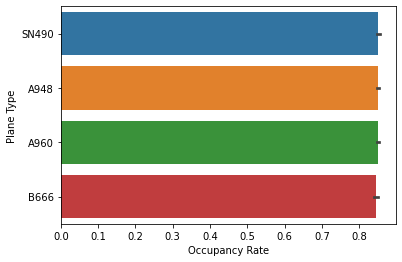

In [ ]:
sns.barplot(df['Occupancy Rate'],df['Plane Type'])
#plotting bar plot of column occupancy rate with plane type column

In [ ]:

df['number of seats'] = df['Plane Type'].apply(lambda x: 600 if x=='A948' else (400 if x=='A960' else(250 if x == 'SN490' else(480 if x=='B666' else "Nan"))))
#creating a new column in dataframe number of seats from the data type column containing the values 600 for A948 , 400 for A960 , 250 for SN490 , 480 for B666 and otherwise Nan

In [ ]:

df['number of seats'].unique() #finding all the unique values of the df number of seats

array([250, 600, 400, 480])

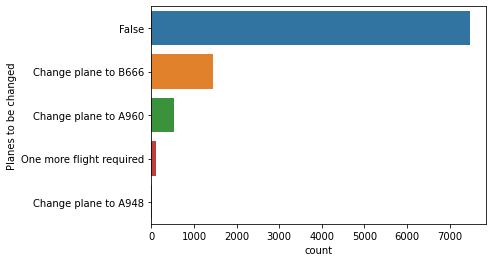

In [ ]:

df['Planes to be changed'] = df['Occupancy Rate'].apply(lambda x: True if x>=1 else False) #creating a new dataframe Plans to be chnages from occupancy rate containing the values True if x>=1 else false
df.loc[(df['Plane Type'] == 'A948') & (df['number of seats'] * df['Occupancy Rate'] <= 480), 'Planes to be changed'] = 'Change plane to B666' #making the row where plane type id A948 and no. of seats*occupancy rate <=480 to chnage plane to B666
df.loc[(df['Plane Type'] == 'B666') & (df['number of seats'] * df['Occupancy Rate'] <= 400), 'Planes to be changed'] = 'Change plane to A960' #making the row where plane type id B666 and no. of seats*occupancy rate <=400 to chnage plane to B666
df.loc[(df['Plane Type'] == 'A948') & (df['number of seats'] * df['Occupancy Rate'] <= 250), 'Planes to be changed'] = 'Change plane to SN490' #making the row where plane type id A948 and no. of seats*occupancy rate <=480 to chnage plane to B666
df.loc[(df['Plane Type'] == 'A948') & (df['Occupancy Rate'] == 1), 'Planes to be changed'] = 'One more flight required' #making the row where plane type id A948 and occupancy rate == 1 to One more flight required
df.loc[(df['Plane Type'] == 'SN490') & (df['Occupancy Rate'] == 1), 'Planes to be changed'] = 'Change plane to A960'#making the row where plane type id SN490 and occupancy rate == 1 to Change plane to A960
df.loc[(df['Plane Type'] == 'A960') & (df['Occupancy Rate'] == 1), 'Planes to be changed'] = 'Change plane to B666' #making the row where plane type id A960 and occupancy rate == 1 to Change plane to B666
df.loc[(df['Plane Type'] == 'B666') & (df['Occupancy Rate'] == 1), 'Planes to be changed'] = 'Change plane to A948' #making the row where plane type id B666 and occupancy rate == 1 to Change plane to A948
sns.countplot(y = df['Planes to be changed']) #plotting a countplot with planes to be chnaged

In [ ]:

df.head(5) #printing the first five rows to check the changes

,Takeoff Date Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate,Destination encoded,Origin encoded,Cancelled encoded,Carrier encoded,Plane Type encoded,number of seats,Planes to be changed
0,2077-11-28 16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,4,559,0.0,0,AL-9002,Shillong,0,56.0,SN490,0.84,9,4,0,1,3,250,False
1,2077-11-23 17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,0,1090,0.0,0,AL-7396,Trichy,3,139.0,A948,0.89,10,11,0,1,0,600,False
2,2077-06-05 08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,5,959,0.0,0,BA-3941,Bengaluru,0,120.0,A948,0.89,1,0,0,3,0,600,False
3,2077-04-27 14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,5,708,0.0,0,AI-9119,Bengaluru,1,63.0,SN490,0.95,1,9,0,0,3,250,False
4,2077-08-01 05:17:36,74232.9,113713.60,False,VIP,Lucknow,1,1959,0.0,0,VI-5208,Trichy,0,220.0,A960,0.93,10,6,0,9,1,400,False


In [ ]:

changing_flights = df.loc[df['Planes to be changed'] != False] #getting values where plans to be changed is not false
changing_flights = changing_flights.drop(['Average Ticket Price (Economy Class)','Average Ticket Price (Premium Class)','Cancelled','Origin Weather','Distance (Miles)','Flight Delay','Flight Delay (Min)','Destination Weather','Total Flight Time (mins)','Total Flight Time (mins)','Origin encoded','Cancelled encoded','Carrier encoded','Plane Type encoded','Destination encoded'],axis = 1) #dropping theirelevant columns
changing_flights #printing changing values

,Takeoff Date Time,Carrier,Origin,Flight Number,Destination,Plane Type,Occupancy Rate,number of seats,Planes to be changed
9,2077-05-15 15:42:03,ARCHIPELAGO,Lucknow,AR-6517,Shillong,A948,0.80,600,Change plane to B666
15,2077-03-12 11:04:37,BANANA,Indore,BA-5578,Udaipur,A948,0.79,600,Change plane to B666
17,2077-05-20 22:34:51,PEACOCK,Trichy,PE-3968,Lucknow,A948,0.74,600,Change plane to B666
18,2077-03-20 18:17:35,STELLARCRAFT,Indore,ST-7961,Kashipur,B666,0.81,480,Change plane to A960
29,2077-12-01 20:55:34,ALPHABET,Lucknow,AL-2163,Kashipur,B666,0.76,480,Change plane to A960
...,...,...,...,...,...,...,...,...,...
9965,2077-03-01 14:00:44,SPACEAXE,Ranchi,SP-7599,Kolkata,A948,0.78,600,Change plane to B666
9966,2077-06-03 18:00:06,BANANA,Raipur,BA-5013,Shillong,A948,0.73,600,Change plane to B666
9970,2077-12-20 10:29:51,AIRAMAZON,Indore,AI-4228,Raipur,A948,1.00,600,One more flight required
9983,2077-09-20 11:45:21,ALPHABET,Ranchi,AL-6845,Raipur,A948,1.00,600,One more flight required


In [ ]:

changing_flights['Routes'] = changing_flights['Origin'] + " " + changing_flights['Destination'] #creating a columnn routes merging the columns origin and destination
changing_flights = changing_flights.drop(['Origin','Destination'],axis=1) #dropping the columns origin and destination
changing_flights.head(5) #printing the first five columns changing_flights

,Takeoff Date Time,Carrier,Flight Number,Plane Type,Occupancy Rate,number of seats,Planes to be changed,Routes
9,2077-05-15 15:42:03,ARCHIPELAGO,AR-6517,A948,0.80,600,Change plane to B666,Lucknow Shillong
15,2077-03-12 11:04:37,BANANA,BA-5578,A948,0.79,600,Change plane to B666,Indore Udaipur
17,2077-05-20 22:34:51,PEACOCK,PE-3968,A948,0.74,600,Change plane to B666,Trichy Lucknow
18,2077-03-20 18:17:35,STELLARCRAFT,ST-7961,B666,0.81,480,Change plane to A960,Indore Kashipur
29,2077-12-01 20:55:34,ALPHABET,AL-2163,B666,0.76,480,Change plane to A960,Lucknow Kashipur


In [ ]:

changing_fights_grouped = changing_flights.groupby('Planes to be changed') #creating changing_fights_grouped by combining the rseults from planes to be chnaged
changing_fights_grouped.groups #grouping the data

{'Change plane to A948': [707, 948, 1249, 1253, 1399, 1913, 2122, 3129, 3573, 3729, 3864, 4438, 5043, 5407, 5648, 5955, 6056, 6384, 6662, 7272, 7307, 8666, 9321, 9417], 'Change plane to A960': [18, 29, 36, 59, 67, 128, 143, 149, 173, 185, 230, 234, 269, 281, 300, 308, 328, 375, 391, 404, 439, 460, 471, 513, 532, 537, 541, 559, 564, 573, 585, 596, 602, 604, 617, 638, 682, 685, 737, 739, 746, 786, 796, 802, 811, 842, 881, 900, 901, 904, 922, 929, 936, 965, 1014, 1036, 1044, 1052, 1103, 1124, 1149, 1155, 1197, 1232, 1301, 1321, 1365, 1380, 1383, 1395, 1465, 1469, 1523, 1549, 1574, 1597, 1608, 1628, 1642, 1646, 1649, 1656, 1664, 1694, 1733, 1771, 1776, 1809, 1836, 1852, 1856, 1862, 1864, 1867, 1909, 1980, 1997, 1998, 1999, 2015, ...], 'Change plane to B666': [9, 15, 17, 30, 32, 39, 40, 44, 48, 55, 58, 78, 79, 92, 98, 99, 106, 109, 114, 115, 121, 130, 131, 132, 136, 140, 141, 142, 144, 160, 163, 168, 175, 189, 197, 198, 199, 200, 203, 206, 210, 213, 216, 219, 222, 231, 244, 245, 246, 264, 2

In [ ]:
print("The planes which need to be changed  to A948 are ")
planes_to_a948 = changing_fights_grouped.get_group('Change plane to A948')['Flight Number'].unique() #getting unique values from the group chnage plane A948
print(planes_to_a948)
print("The planes which need to be changed to B666 are ")
planes_to_b666 = changing_fights_grouped.get_group('Change plane to B666')['Flight Number'].unique()  #getting unique values from the group chnage plane B666
print(planes_to_b666)
print("The planes which need to be changed to A960 are ")
planes_to_a960 = changing_fights_grouped.get_group('Change plane to A960')['Flight Number'].unique() #getting unique values from the group chnage plane A960
print(planes_to_a960)

The planes which need to be changed  to A948 are 
['BA-2446' 'AR-6923' 'SP-6236' 'AL-1686' 'VI-7735' 'BI-4452' 'VI-1684'
 'ST-9634' 'SE-1718' 'BA-2171' 'BI-9030' 'VI-4659' 'AL-3482' 'VI-9842'
 'PE-5067' 'BI-5434' 'BA-5019' 'SP-8082' 'ST-1497' 'BI-6632' 'AL-8536'
 'ST-2254' 'SE-3364' 'AI-1629']
The planes which need to be changed to B666 are 
['AR-6517' 'BA-5578' 'PE-3968' ... 'SP-7599' 'BA-5013' 'PE-6005']
The planes which need to be changed to A960 are 
['ST-7961' 'AL-2163' 'SE-3265' 'AI-1804' 'BI-5808' 'SE-1060' 'AI-6321'
 'AL-7320' 'ST-8626' 'BA-4663' 'PE-8500' 'ST-3223' 'ST-5157' 'BI-5848'
 'AL-7078' 'PE-1112' 'BA-3436' 'BI-5634' 'BI-9786' 'BI-9533' 'VI-9294'
 'BA-8001' 'SE-5609' 'PE-4312' 'AR-2770' 'ST-6796' 'AI-3890' 'AR-6035'
 'AR-7946' 'AR-6314' 'BI-3331' 'VI-6483' 'AR-8234' 'ST-8982' 'AL-9438'
 'BA-6324' 'BI-4427' 'AR-8265' 'VI-3599' 'AL-1178' 'BA-7332' 'AI-7894'
 'ST-3059' 'ST-8959' 'ST-4454' 'AL-9538' 'SP-4214' 'AI-1858' 'AL-2564'
 'BA-7685' 'AI-5988' 'PE-1539' 'ST-3578' 'SP

In [ ]:

print("The routes which require A948 are ")
planes_to_a948 = changing_fights_grouped.get_group('Change plane to A948')['Routes'].unique() #getting unique values of routes from the group chnage plane A948
print(planes_to_a948)
print("The routes which require B666 are ")
planes_to_b666 = changing_fights_grouped.get_group('Change plane to B666')['Routes'].unique() #getting unique values of routes from the group chnage plane B666
print(planes_to_b666)
print("The routes which require A960 are ")
planes_to_a960 = changing_fights_grouped.get_group('Change plane to A960')['Routes'].unique() #getting unique values of routes from the group chnage plane A960
print(planes_to_a960)
print("The routes which require One more plane are ")
one_more_plane = changing_fights_grouped.get_group('One more flight required')['Routes'].unique() #getting unique values of routes from the group one more flight required
print(one_more_plane)

The routes which require A948 are 
['Lucknow Trichy' 'Kolkata Kashipur' 'Trichy Udaipur' 'Indore Kozhikode'
 'Kozhikode Kashipur' 'Ranchi Kashipur' 'Kashipur Ranchi'
 'Udaipur Shillong' 'Trichy Bengaluru' 'Ahmedabad Bengaluru'
 'Lucknow Udaipur' 'Ranchi Bengaluru' 'Bengaluru Raipur'
 'Kolkata Shillong' 'Shillong Trichy' 'Lucknow Indore' 'Trichy Ranchi'
 'Kozhikode Udaipur' 'Trichy Kolkata' 'Kolkata Ahmedabad']
The routes which require B666 are 
['Lucknow Shillong' 'Indore Udaipur' 'Trichy Lucknow' 'Indore Bengaluru'
 'Udaipur Shillong' 'Kolkata Lucknow' 'Kolkata Indore' 'Trichy Raipur'
 'Ranchi Indore' 'Bengaluru Ahmedabad' 'Bengaluru Kozhikode'
 'Trichy Ahmedabad' 'Udaipur Indore' 'Raipur Ranchi' 'Shillong Trichy'
 'Raipur Lucknow' 'Lucknow Ahmedabad' 'Ranchi Kozhikode' 'Trichy Kolkata'
 'Kashipur Kozhikode' 'Ahmedabad Shillong' 'Kashipur Trichy'
 'Raipur Kashipur' 'Ranchi Bengaluru' 'Bengaluru Udaipur'
 'Udaipur Ahmedabad' 'Raipur Kolkata' 'Ranchi Ahmedabad' 'Shillong Indore'
 'Kozhi

In [ ]:
df.head(5) #PRINTING THE FIRST FIVE VALUES TO CHECK

,Takeoff Date Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate,Destination encoded,Origin encoded,Cancelled encoded,Carrier encoded,Plane Type encoded,number of seats,Planes to be changed
0,2077-11-28 16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,4,559,0.0,0,AL-9002,Shillong,0,56.0,SN490,0.84,9,4,0,1,3,250,False
1,2077-11-23 17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,0,1090,0.0,0,AL-7396,Trichy,3,139.0,A948,0.89,10,11,0,1,0,600,False
2,2077-06-05 08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,5,959,0.0,0,BA-3941,Bengaluru,0,120.0,A948,0.89,1,0,0,3,0,600,False
3,2077-04-27 14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,5,708,0.0,0,AI-9119,Bengaluru,1,63.0,SN490,0.95,1,9,0,0,3,250,False
4,2077-08-01 05:17:36,74232.9,113713.60,False,VIP,Lucknow,1,1959,0.0,0,VI-5208,Trichy,0,220.0,A960,0.93,10,6,0,9,1,400,False


In [ ]:
 
month = pd.DatetimeIndex(df['Takeoff Date Time']).month #getting month from the date column
year = pd.DatetimeIndex(df['Takeoff Date Time']).year #getting year from the date column
hour = pd.DatetimeIndex(df['Takeoff Date Time']).hour #getting hour from the date column
print(month.unique()) #printing unique values from the months
print(year.unique()) #printing unique values from the years
print(hour.unique()) #printing unique values from the hours
df['Month of takeoff'] = month #creating month of takeoff containing the values of month
df['Hour of takeoff'] = hour #creating hour of takeoff containing the values of hour
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head(5)

Int64Index([11, 6, 4, 8, 10, 1, 5, 2, 7, 3, 12, 9], dtype='int64', name='Takeoff Date Time')
Int64Index([2077], dtype='int64', name='Takeoff Date Time')
Int64Index([16, 17,  8, 14,  5, 23, 18, 22, 15,  3, 10,  2, 19, 11,  7,  1,  9,
             6, 13, 20,  0, 21, 12,  4],
           dtype='int64', name='Takeoff Date Time')


,Month of takeoff,Hour of takeoff,Takeoff Date Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate,Destination encoded,Origin encoded,Cancelled encoded,Carrier encoded,Plane Type encoded,number of seats,Planes to be changed
0,11,16,2077-11-28 16:37:01,30992.5,137060.00,False,ALPHABET,Kolkata,4,559,0.0,0,AL-9002,Shillong,0,56.0,SN490,0.84,9,4,0,1,3,250,False
1,11,17,2077-11-23 17:47:54,9128.0,86103.50,False,ALPHABET,Udaipur,0,1090,0.0,0,AL-7396,Trichy,3,139.0,A948,0.89,10,11,0,1,0,600,False
2,6,8,2077-06-05 08:36:29,35866.6,164321.15,False,BANANA,Ahmedabad,5,959,0.0,0,BA-3941,Bengaluru,0,120.0,A948,0.89,1,0,0,3,0,600,False
3,4,14,2077-04-27 14:27:27,31801.0,120228.50,False,AIRAMAZON,Shillong,5,708,0.0,0,AI-9119,Bengaluru,1,63.0,SN490,0.95,1,9,0,0,3,250,False
4,8,5,2077-08-01 05:17:36,74232.9,113713.60,False,VIP,Lucknow,1,1959,0.0,0,VI-5208,Trichy,0,220.0,A960,0.93,10,6,0,9,1,400,False


In [ ]:
df_grouped = df.groupby('Carrier')
df_grouped.get_group('ALPHABET')['Average Ticket Price (Premium Class)']

0       137060.00
1        86103.50
6        77486.50
19      112707.00
29       74179.00
          ...    
9957    135380.00
9963     97660.50
9983    121649.50
9992    165191.25
9993    135243.50
Name: Average Ticket Price (Premium Class), Length: 961, dtype: float64

In [ ]:
prices_of_premium_class = df['Average Ticket Price (Premium Class)']
prices_of_economy_class = df['Average Ticket Price (Economy Class)']
x = df[['Month of takeoff','Hour of takeoff','Origin Weather','Distance (Miles)','Flight Delay','Destination Weather','Total Flight Time (mins)','Occupancy Rate','Destination encoded','Origin encoded','Cancelled encoded','Carrier encoded','Plane Type encoded','number of seats']]
lr1 = LinearRegression()
lr1.fit(x,prices_of_economy_class)
prices_of_economy_class_pred = lr1.predict(x)
lr2 = LinearRegression()
lr2.fit(x,prices_of_premium_class)
prices_of_premium_class_pred = lr2.predict(x)
lr2.score(x,prices_of_premium_class)

0.0024732099038591304

In [ ]:
prices_of_premium_class_alphabet = df_grouped.get_group('ALPHABET')['Average Ticket Price (Premium Class)']
prices_of_economy_class_alphabet = df_grouped.get_group('ALPHABET')['Average Ticket Price (Economy Class)']
x = df_grouped.get_group('ALPHABET')[['Month of takeoff','Hour of takeoff','Origin Weather','Distance (Miles)','Flight Delay','Destination Weather','Total Flight Time (mins)','Occupancy Rate','Destination encoded','Origin encoded','Cancelled encoded','Carrier encoded','Plane Type encoded','number of seats']]
lr1 = LinearRegression()
lr1.fit(x,prices_of_economy_class_alphabet)
prices_of_economy_class_alphabet_pred = lr1.predict(x)
lr2 = LinearRegression()
lr2.fit(x,prices_of_premium_class_alphabet)
prices_of_premium_class_alphabet_pred = lr2.predict(x)
lr2.score(x,prices_of_premium_class_alphabet)

0.02075810571075798

In [ ]:
prices_of_premium_class_alphabet

0       137060.00
1        86103.50
6        77486.50
19      112707.00
29       74179.00
          ...    
9957    135380.00
9963     97660.50
9983    121649.50
9992    165191.25
9993    135243.50
Name: Average Ticket Price (Premium Class), Length: 961, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


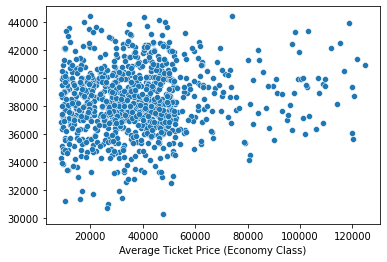

In [ ]:
sns.scatterplot(prices_of_economy_class_alphabet, prices_of_economy_class_alphabet_pred)

In [ ]:
df.head(1)

,Month of takeoff,Hour of takeoff,Takeoff Date Time,Average Ticket Price (Economy Class),Average Ticket Price (Premium Class),Cancelled,Carrier,Origin,Origin Weather,Distance (Miles),Flight Delay,Flight Delay (Min),Flight Number,Destination,Destination Weather,Total Flight Time (mins),Plane Type,Occupancy Rate,Destination encoded,Origin encoded,Cancelled encoded,Carrier encoded,Plane Type encoded,number of seats,Planes to be changed
0,11,16,2077-11-28 16:37:01,30992.5,137060.0,False,ALPHABET,Kolkata,4,559,0.0,0,AL-9002,Shillong,0,56.0,SN490,0.84,9,4,0,1,3,250,False


In [ ]:
df['Routes'] = df['Origin'] + " " +df['Destination']
df['Routes encoded']=label_encoder.fit_transform(df['Routes'])
df_grouped_by_routes = df.groupby('Routes encoded')
prices_of_premium_class_Route1 = df_grouped_by_routes.get_group(1)['Average Ticket Price (Premium Class)']
x = df_grouped_by_routes.get_group(1)[['Month of takeoff','Hour of takeoff','Origin Weather','Distance (Miles)','Destination Weather','Carrier encoded','Plane Type encoded']]
lr_routes = LinearRegression()
lr_routes.fit(x,prices_of_premium_class_Route1)
prices_of_premium_class_Route1_pred = lr_routes.predict(x)
lr_routes.score(x,prices_of_premium_class_Route1)

0.09684347092614076

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


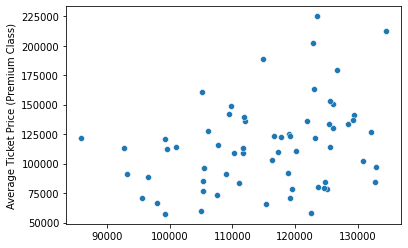

In [ ]:
sns.scatterplot(prices_of_premium_class_Route1_pred,df_grouped_by_routes.get_group(1)['Average Ticket Price (Premium Class)'])

In [ ]:
aloo_lelo = pd.DataFrame(prices_of_premium_class_Route1_pred,df_grouped_by_routes.get_group(1)['Average Ticket Price (Premium Class)'])
aloo_lelo

,0
Average Ticket Price (Premium Class),
125072.50,119072.392393
136426.50,112081.778634
202042.40,122893.432544
110985.00,120201.099134
224963.55,123524.187889
...,...
57302.00,99192.387064
113487.50,111700.192277
71081.50,95561.912645
